Importy i stałe

In [132]:
import numpy as np
import matplotlib.pyplot as plt

rozmiar = 40
gora = -100
lewo = 200
dol = -50
prawo = 100

# Macierz kwadratowa wypełniona 0
matrix = np.zeros((rozmiar **2, rozmiar **2))
# Wektor wypełniony 0
vector = np.zeros(rozmiar**2)


wyliczanie maciezy, np T(1,1) itd ile razy konkretny element sie powrotzyl, to co na zajeciach,

pierwsza czesc, wypenienie maciezy

In [133]:
def wylicz():
    # Counter
    index = 0
    for i in range(rozmiar):
        #dla kazdego punktu, uklad rownan od sasiadow (gornego, dolnego, lewego i prawego)
        for j in range(rozmiar):
            # ----------------- warunki brzegowe -----------------
            # Wylicz górną granicę
            if i == rozmiar - 1:
                # Dodaj górną wartość do odpowiedniego elementu wektora
                vector[index] += gora
            else:
                # Ustaw na 1, dla polaczenia
                matrix[index, (i + 1) * rozmiar + j] = 1

            # Wylicz dolną granicę
                # Jeżeli i jest na dolnej granicy
            if i == 0:
            # Dodaj dolna wartość do odpowiedniego elementu wektora
                vector[index] += dol
            else:
                # Ustaw na 1, dla polaczenia
                matrix[index, (i - 1) * rozmiar + j] = 1

            # Wylicz lewa granicę
            # Jeżeli j jest na lewa granicy
            if j == 0:
                # Dodaj lewa wartość do odpowiedniego elementu wektora
                vector[index] += prawo
            else:
                # Ustaw na 1, dla polaczenia
                matrix[index, i * rozmiar + j - 1] = 1

            # Wylicz prawa granicę
                # Jeżeli j jest na prawej granicy
            if j == rozmiar - 1:
                # Dodaj prawa wartość do odpowiedniego elementu wektora
                vector[index] += lewo
            else:
                # Ustaw na 1, dla polaczenia
                matrix[index, i * rozmiar + j + 1] = 1

            # -------------------- przekatna -----------------------
            # Ustawiamy wartość elementu przekatnego na -4, wg operatora LaPlace'a dla siatki 2D
            matrix[index, index] = -4
            index += 1

    return matrix, vector

rozwiazanie maciezy i vektora wyniku przez gaussa

In [134]:
def rozwiazGaussem(A, B): #elimicaja gaussa z czesciowym wyborem elementu glownego, uklad rownan: A*x=B
    #A -> kwadratowa maciez wspolczynnikow
    #b -> vektor wyrazow wolnych
    #x -> vektor niewiadomych
    n = len(A)
    #eliminacja gaussa
    for p in range(n):
        max_index = np.argmax(np.abs(A[p:, p])) + p #wybor najwiekszego elementu w kolumnie
        #zamiana wierszy, tak aby najwiekszy byl zawsze na przekatnej
        A[[p, max_index]] = A[[max_index, p]]
        B[p], B[max_index] = B[max_index], B[p]

        if abs(A[p, p]) <= 1e-10:
            raise RuntimeError("Macierz jest jednostkowa, albo prawie jednostkowa") #warunek, jesli przekatna okaze sie byc zbyt bliska zeru,
            #przeciw osobliwej maciezy

        for i in range(p + 1, n): #eliminacja gaussa ponizej wiersza p
            alpha = A[i, p] / A[p, p] #wyliczenie alfa dla ktory wyzeruje element pod przekatna
            B[i] -= alpha * B[p] #odjecie przemnozonego wiersza p z wiersza i w obydwu maciezach (A i B)
            A[i, p:] -= alpha * A[p, p:]

    #zamiana wsteczna (rozwiazanie ukladu, wszystkie pivoty wyznaczone)
    x = np.zeros(n)#maciez wynikowa
    for i in range(n - 1, -1, -1):
        x[i] = (B[i] - np.sum(A[i, i + 1:] * x[i + 1:])) / A[i, i] #odjecie znanych skladnikow i podzieleenie przez wspolczynnik przy niewiadomej

    return x

wywolanie funkcji i rozwiazanie maciezy

In [135]:
wyliczonaMaciez, wyliczonyVektor = wylicz()

answer = rozwiazGaussem(wyliczonaMaciez,wyliczonyVektor)

answer_matrix = answer.reshape(rozmiar, rozmiar)

# Wypisanie wyników na konsoli
for i in range(39, -1, -1):
    for j in range(39, -1, -1):
        print(f"{answer[40 * i + j]:.2f}", end=" ")
    print()


-49.97 9.36 37.28 52.57 62.00 68.34 72.88 76.28 78.92 81.01 82.71 84.10 85.25 86.21 87.02 87.68 88.23 88.68 89.03 89.30 89.48 89.59 89.61 89.55 89.41 89.17 88.84 88.38 87.78 87.02 86.04 84.79 83.18 81.05 78.16 74.06 67.90 57.82 39.33 -0.10 
-109.23 -49.87 -12.83 11.00 27.09 38.48 46.90 53.33 58.38 62.42 65.72 68.44 70.70 72.59 74.17 75.48 76.57 77.45 78.15 78.68 79.05 79.26 79.31 79.20 78.92 78.45 77.79 76.89 75.73 74.25 72.36 69.96 66.88 62.86 57.52 50.18 39.70 24.06 -0.39 -39.72 
-137.08 -86.78 -49.71 -22.83 -3.14 11.60 22.90 31.76 38.83 44.58 49.31 53.23 56.52 59.27 61.58 63.51 65.11 66.41 67.45 68.23 68.77 69.08 69.16 69.01 68.60 67.93 66.97 65.68 64.01 61.88 59.19 55.80 51.51 46.01 38.87 29.43 16.67 -0.88 -25.24 -58.41 
-152.31 -110.48 -76.39 -49.48 -28.41 -11.83 1.35 11.97 20.62 27.76 33.70 38.67 42.86 46.39 49.37 51.87 53.95 55.64 56.99 58.01 58.73 59.14 59.25 59.06 58.55 57.70 56.48 54.85 52.74 50.06 46.72 42.54 37.34 30.80 22.53 11.99 -1.56 -19.02 -41.26 -68.68 
-161.67 -126.4

wyrysowanie heatMapy

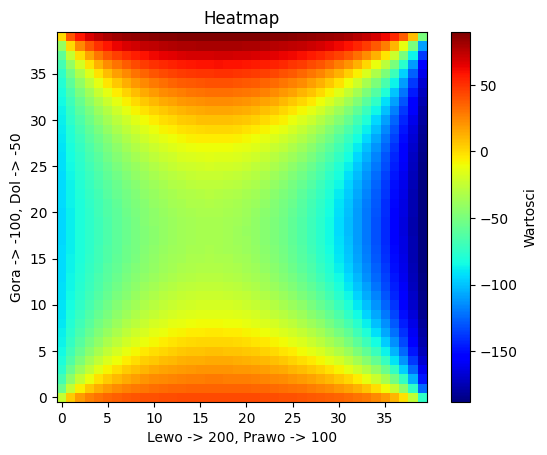

In [139]:
# Heatmapa
plt.imshow(answer_matrix, cmap='jet', origin='lower')
plt.colorbar(label='Wartosci')
plt.title('Heatmap')
plt.xlabel('Lewo -> 200, Prawo -> 100')
plt.ylabel('Gora -> -100, Dol -> -50')
plt.show()